In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt

In [2]:
# k-近邻算法
# 计算距离
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]  # shape读取数据矩阵第一维度的长度
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet  # tile重复数组inX，有dataSet行 1个dataSet列，减法计算差值
    sqDiffMat = diffMat ** 2
    sqDisttances = sqDiffMat.sum(axis=1)  # 普通sum默认参数为axis=0为普通相加，axis=1为一行的行向量相加
    distances = sqDisttances ** 0.5
    sortedDistIndicies = distances.argsort()  # argsort返回数值从小到大的索引值（数组索引0,1,2,3）
    # 选择距离最小的k个点
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]  # 根据排序结果的索引值返回靠近的前k个标签
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1  # 各个标签出现频率
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)  # 排序频率
    # !!!!!  classCount.iteritems()修改为classCount.items()
    # sorted(iterable, cmp=None, key=None, reverse=False) --> new sorted list。
    # reverse默认升序 key关键字排序itemgetter（1）按照第一维度排序(0,1,2,3)
    return sortedClassCount[0][0]  # 找出频率最高的

In [3]:
# 创建数据集
def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [4]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)  # 读出数据行数
    returnMat = np.zeros((numberOfLines, 3))  # 创建返回矩阵
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()  # 删除空白符
        listFromLine = line.split('\t')  # split指定分隔符对数据切片
        returnMat[index, :] = listFromLine[0:3]  # 选取前3个元素（特征）存储在返回矩阵中
        classLabelVector.append(int(listFromLine[-1]))
        # -1索引表示最后一列元素,位label信息存储在classLabelVector
        index += 1
    return returnMat, classLabelVector

In [5]:
# 归一化特征值
# 归一化公式  ：（当前值-最小值）/range
def autoNorm(dataSet):
    minVals = dataSet.min(0)  # 存放每列最小值，参数0使得可以从列中选取最小值，而不是当前行
    maxVals = dataSet.max(0)  # 存放每列最大值
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))  # 初始化归一化矩阵为读取的dataSet
    m = dataSet.shape[0]  # m保存第一行
    # 特征矩阵是3x1000，min max range是1x3 因此采用tile将变量内容复制成输入矩阵同大小
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [6]:
# 测试约会网站分类结果代码
def datingClassTest():
    hoRatio = 0.10  # hold out 10%
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')  # load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print("分类器返回的值: %s, 正确的值: %s" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("总的错误率是: %f" % (errorCount / float(numTestVecs)))
    print("错误的个数：%f" % errorCount)

In [7]:
# 完整的约会网站预测：给定一个人，判断时候适合约会
def classifyPerson():
    resultList = ['不喜欢', '一般喜欢', '特别喜欢']
    percentTats = float(input("玩游戏占的百分比"))
    ffMiles = float(input("每年坐飞机多少公里"))
    iceCream = float(input("每年吃多少公升的冰淇淋"))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr - minVals) / ranges, normMat, datingLabels, 3)

    print("你将有可能对这个人是:", resultList[int(classifierResult) - 1])

In [8]:
datingClassTest() #分类器针对约会网站的测试代码

分类器返回的值: 3, 正确的值: 3
分类器返回的值: 2, 正确的值: 2
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 2, 正确的值: 2
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 2, 正确的值: 2
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 2, 正确的值: 2
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 3, 正确的值: 2
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 2, 正确的值: 2
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 2, 正确的值: 2
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 2, 正确的值: 2
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 2, 正确的值: 2
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 2, 正确的值: 2
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 2, 正确的值: 2
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 3, 正确的值: 3
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 1, 正确的值: 1
分类器返回的值: 2, 正确的值: 2


In [10]:
classifyPerson()  # 约会网站预测

玩游戏占的百分比 1.2
每年坐飞机多少公里 10000
每年吃多少公升的冰淇淋 0.1


你将有可能对这个人是: 一般喜欢


# 简单的knn模型

In [11]:
import numpy as np
import operator

def createData():
    group=np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels=['A','A','B','B']
    return group,labels

group,labels=createData()
print("预测点的类别为:",classify0([1.0,1.2],group,labels,3))

预测点的类别为: A


In [12]:
datamat,datalabels=file2matrix('datingTestSet2.txt')
print(datamat,'\n',datalabels)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]] 
 [3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1

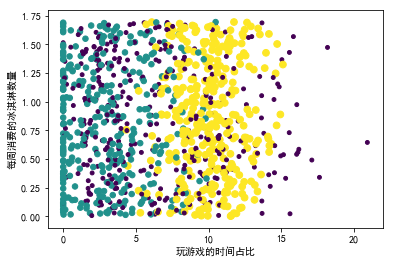

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datamat[:,1],datamat[:,2],15.0*np.array(datalabels),15.0*np.array(datalabels))
plt.xlabel('玩游戏的时间占比')
plt.ylabel('每周消费的冰淇淋数量')
plt.show()